In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X = pd.read_excel('./X_train.xlsx')
Y = pd.read_excel('./Y_train.xlsx')
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [3]:
X = X.values.flatten()
Y = Y.values.flatten()

In [4]:
X,Y

(array([-0.54020582, -0.24732765,  1.74833811, ..., -0.49204389,
        -1.32096635, -0.19706158]),
 array([ -78.13445249,   -3.37721507,  152.89284833, ...,  -39.89914867,
        -122.24004618,   -6.75527246]))

In [5]:
X.shape

(2999,)

# data visualise 

In [6]:
plt.style.use('seaborn-v0_8-darkgrid')

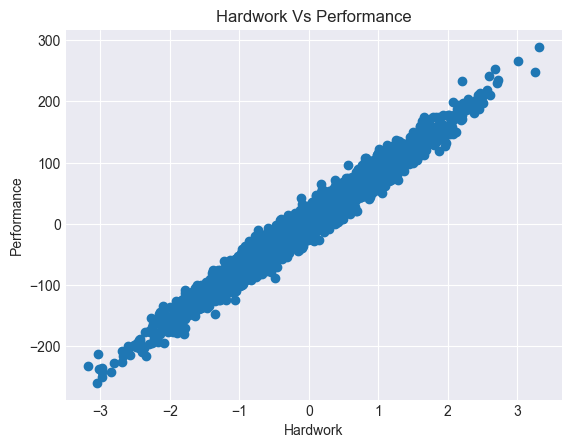

In [7]:
plt.scatter(X,Y)
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title('Hardwork Vs Performance')
plt.show()

# Regression

In [8]:
def hypothesis(x,thetha):
    # thetha = [thetha0, thetha1]
    y_ = thetha[1]*x + thetha[0]
    return y_

In [9]:
# grad[0] = 1/m sigma (y_ - y)
# grad[1] = 1/m sigma (y_ - y)*x[i]
def gradient(X,Y,thetha):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        y_ = hypothesis(X[i],thetha)
        y = Y[i]
        x = X[i]
        grad[0] += (y_-y)
        grad[1] += (y_-y)*x
    
    return grad/m

In [10]:
def error(X,Y,thetha):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],thetha)
        total_error += (y_ - Y[i])**2

    return total_error/m

In [11]:
def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    thetha = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        
        grad = gradient(X,Y,thetha)
        e = error(X,Y,thetha)
        error_list.append(e)

         # update thetha
        thetha[0] = thetha[0] - learning_rate*grad[0]
        thetha[1] = thetha[1] - learning_rate*grad[1]

    return thetha,error_list

In [12]:
thetha,error_list = gradientDescent(X,Y)

In [13]:
thetha

array([ 3.87586548, 80.73961953])

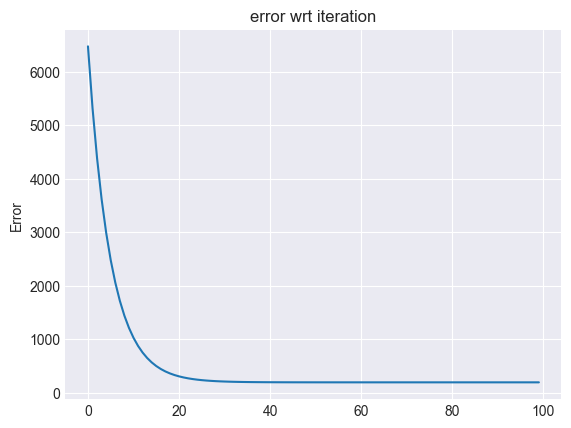

In [14]:
plt.plot(error_list)
plt.ylabel('Error')
plt.title('error wrt iteration')
plt.show()

In [15]:
Y_ = hypothesis(X,thetha)

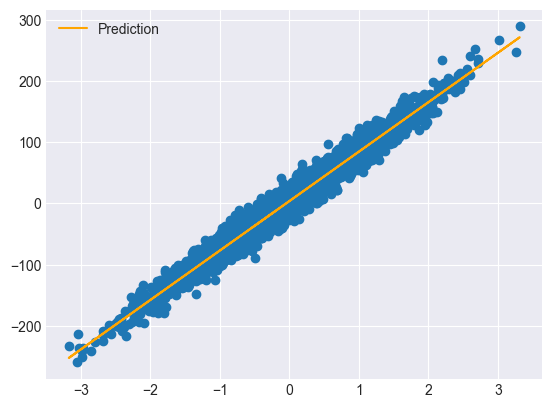

In [16]:
plt.scatter(X,Y)
plt.plot(X,Y_,color='orange',label='Prediction')
plt.legend()
plt.show()

In [17]:
X_test = X_test.values.flatten()
Y_test = Y_test.values.flatten()

In [18]:
y_pred = hypothesis(X_test,thetha)

In [19]:
df = pd.DataFrame(data=y_pred,columns=["y"])
df.to_csv('y_pred.csv',index=False)

# Computing Score

In [20]:
# r2 square (coefficient of determination)
# r2 square = 1 - sigma (y[i]-y_[i])**2/(y[i]-yavg[i])**2

# calculate r2 score on training data
def R2score(Y,Y_):
    # np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)

    score = (1-num/denom)
    return score*100

In [21]:
R2score(Y,Y_) #on train data

97.05195161402541

In [22]:
R2score(Y_test,y_pred) #on test data

97.25490476485182

# Visualise Loss function

In [24]:
# loss 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)


for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)

print(J.shape)

(80, 80)


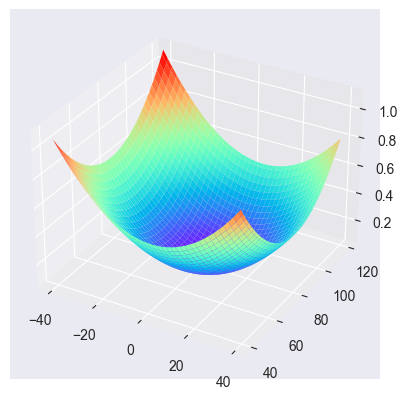

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

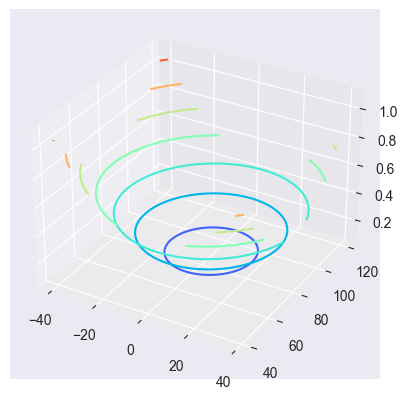

In [27]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()